# Performing Regressions with multiple models
- Support vector machines
- Nearest neighbors regression
- Stochastic gradient descent
- Decision tree regression
- Least angle regression
- lasso,ridge and elastic net regularized regression

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#import warnings
#warnings.filterwarnings("ignore")

In [92]:
automobile_df = pd.read_csv("./datasets/auto-mpg-processed.csv")
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,25.5,4,122.0,96,2300,15.5,43
1,27.2,4,141.0,71,3190,24.8,41
2,23.8,4,151.0,85,2855,17.6,42
3,34.0,4,112.0,88,2395,18.0,38
4,16.0,8,302.0,140,4141,14.0,46


In [93]:
result_dict = {}

In [152]:
def build_model(regression_fn,                
                name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2,
               preprocess_fn=None,
               show_plot_Y=False,
               show_plot_scatter=False):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
       
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training Score: ",model.score(x_train,y_train))
    print("Test Score: ",r2_score(y_test,y_pred))
    
    if show_plot_scatter==True:
        fig,ax = plt.subplots(figsize=(10,8))
        plt.scatter(x_test,y_test)
        plt.plot(x_test,y_pred,'r')
        plt.legend(['predicted line','Observed data'])
        plt.show()
    
    if show_plot_Y:
        fig,ax = plt.subplots(figsize=(10,8))
        plt.plot(y_pred,label="Predicted")
        plt.plot(y_test.values,label="Actual")
        plt.ylabel(name_of_y_col)
        plt.legend()
        plt.show()

    return {'training_score': model.score(x_train,y_train), 
            'test_score': r2_score(y_test,y_pred)
           }

In [95]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print("Training score: ",result_dict[key]["training_score"])
        print("Test Score: ",result_dict[key]["test_score"])
        print()

In [96]:
def linear_reg(x_train,y_train):
    linear_model = LinearRegression(normalize=True)
    linear_model.fit(x_train,y_train)
    return linear_model

Training Score:  0.6916651049365177
Test Score:  0.6938282077862387


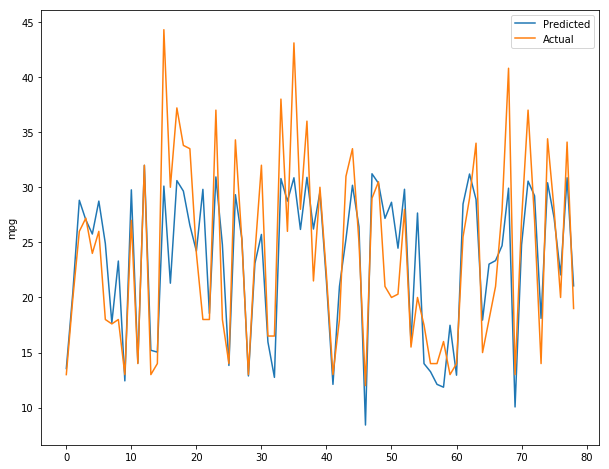

In [97]:
result_dict["mpg- single linear"] = build_model(linear_reg,
                                                'mpg',
                                                ['weight'],
                                                automobile_df,
                                                show_plot_Y=True)

Training Score:  0.8079967652774498
Test Score:  0.8051680563088356


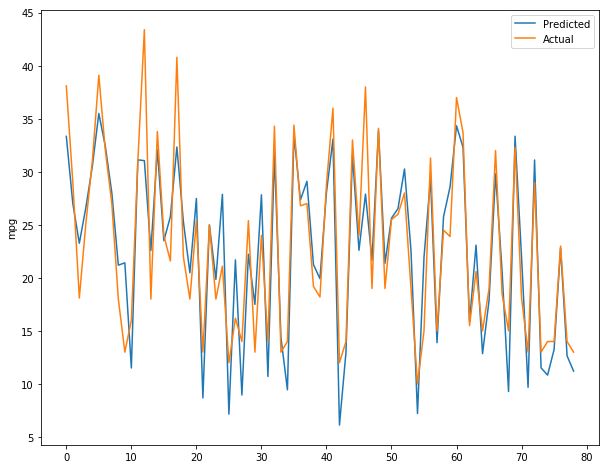

In [98]:
result_dict["mpg- multiple linear all features"] = build_model(linear_reg,
                                                'mpg',
                                                ['acceleration',
                                                 'cylinders',
                                                'weight',
                                                 'horsepower',
                                                 'age','displacement'],
                                                automobile_df,
                                                show_plot_Y=True)

Training Score:  0.8094105577589481
Test Score:  0.7972097998134711


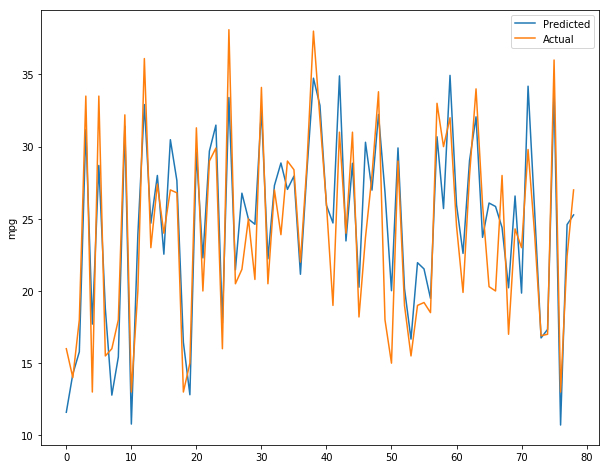

In [99]:
result_dict["mpg- multiple linear 3 features"] = build_model(linear_reg,
                                                'mpg',
                                                [
                                                'weight',
                                                 'horsepower','age'],
                                                automobile_df,
                                                show_plot_Y=True)

In [100]:
compare_results()

Regression:  mpg- single linear
Training score:  0.6916651049365177
Test Score:  0.6938282077862387

Regression:  mpg- multiple linear all features
Training score:  0.8079967652774498
Test Score:  0.8051680563088356

Regression:  mpg- multiple linear 3 features
Training score:  0.8094105577589481
Test Score:  0.7972097998134711



## Lasso regression
This model penalizes complex models and prevents over fitting  
alpha = constant used to multiply the l1-penalty term  
if alpha = 0, it means ordinary linear regression(least square regression) 
higher value alpha means higher penalty

In [101]:
def lasso_reg(x_train,y_train,alpha=.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    return model

Training Score:  0.8005181793444169
Test Score:  0.8331844233613855


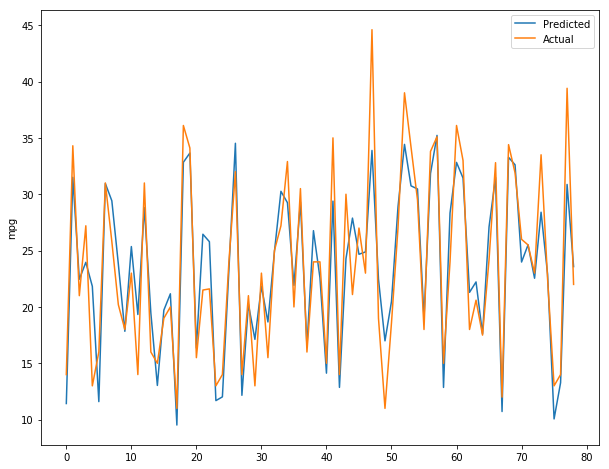

In [102]:
result_dict["mpg- lasso - all features"] = build_model(lasso_reg,
                                                'mpg',
                                                ['acceleration',
                                                 'cylinders',
                                                'weight',
                                                 'horsepower',
                                                 'age','displacement'],
                                                automobile_df,
                                                show_plot_Y=True)

In [103]:
compare_results()

Regression:  mpg- single linear
Training score:  0.6916651049365177
Test Score:  0.6938282077862387

Regression:  mpg- multiple linear all features
Training score:  0.8079967652774498
Test Score:  0.8051680563088356

Regression:  mpg- multiple linear 3 features
Training score:  0.8094105577589481
Test Score:  0.7972097998134711

Regression:  mpg- lasso - all features
Training score:  0.8005181793444169
Test Score:  0.8331844233613855



## Ridge regression
imposes l2 norm penality on coefficients for complex models.
higher value of alpha means high regularization

In [104]:
def ridge_reg(x_train,y_train,alpha=.5):
    model = Ridge(alpha=alpha)
    model.fit(x_train,y_train)
    return model

Training Score:  0.8157375205843821
Test Score:  0.7741856331645409


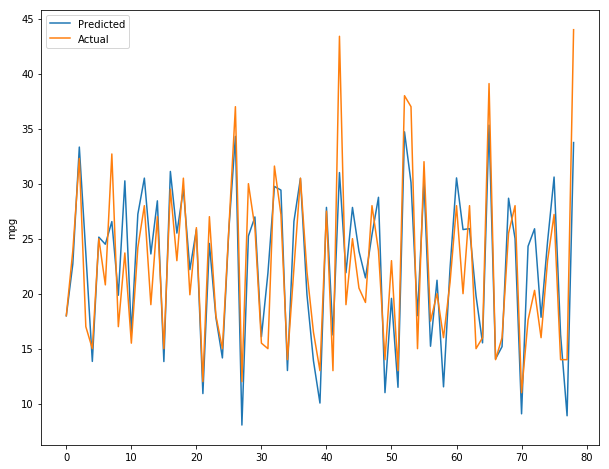

In [105]:
result_dict["mpg- ridge - all features"] = build_model(ridge_reg,
                                                'mpg',
                                                ['acceleration',
                                                 'cylinders',
                                                'weight',
                                                 'horsepower',
                                                 'age','displacement'],
                                                automobile_df,
                                                show_plot_Y=True)

In [106]:
compare_results()

Regression:  mpg- single linear
Training score:  0.6916651049365177
Test Score:  0.6938282077862387

Regression:  mpg- multiple linear all features
Training score:  0.8079967652774498
Test Score:  0.8051680563088356

Regression:  mpg- multiple linear 3 features
Training score:  0.8094105577589481
Test Score:  0.7972097998134711

Regression:  mpg- lasso - all features
Training score:  0.8005181793444169
Test Score:  0.8331844233613855

Regression:  mpg- ridge - all features
Training score:  0.8157375205843821
Test Score:  0.7741856331645409



## Elastic Net regression
This regression combines both type of regularization; ridge and lasso  
alpha = default 1; strength of the regularization  
l1_ratio : the ratio of combination of l1 regularization and l2 regularization  
l1_ratio = 0 means it is l2 penalty ie lasso  
l1_ration = 1 means l1 penality ie ridge  

In [111]:
def elastic_net_reg(x_train,y_train,alpha=1,l1_ratio=0.5,normalize=True,
                   max_iter=100000,warm_start=True,equivalent_to="Elastic Net"):
        print("Equivalent to ",equivalent_to)
        model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,normalize=normalize,
                          max_iter = max_iter,warm_start=warm_start)
        model.fit(x_train,y_train)
        return model

Equivalent to  Ordinary
Training Score:  0.7989336918517038
Test Score:  0.8470045753251034


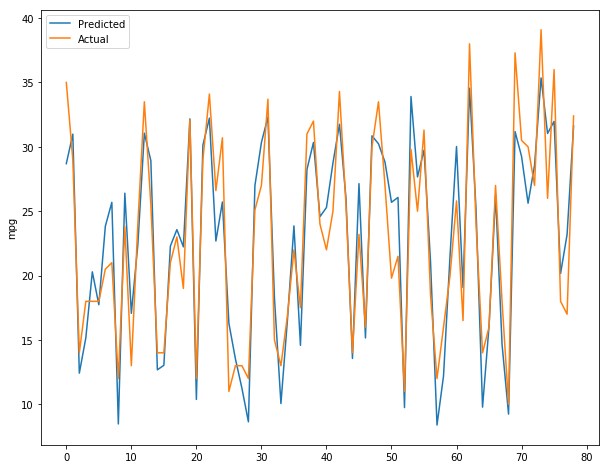

In [112]:
from functools import partial
#partial wil help to change the parameters passed to the model



result_dict["mpg- elastic net - all features"] = build_model(
                                                partial(elastic_net_reg,
                                                        alpha=0,
                                                        equivalent_to="Ordinary"),
                                                'mpg',
                                                ['acceleration',
                                                 'cylinders',
                                                'weight',
                                                 'horsepower',
                                                 'age','displacement'],
                                                automobile_df,
                                                show_plot_Y=True)

Equivalent to  lasso
Training Score:  0.8066022086004647
Test Score:  0.8162729525808397


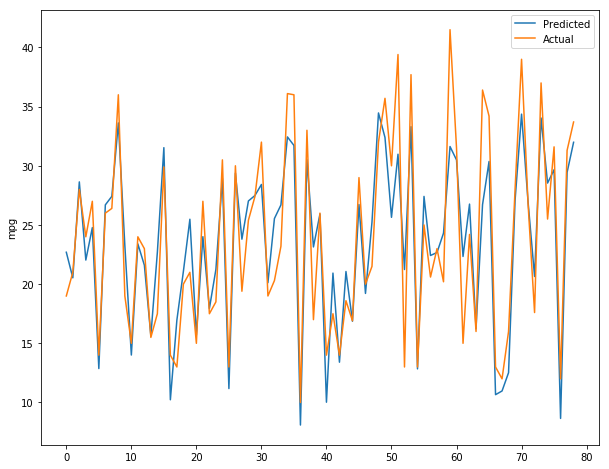

In [115]:

result_dict["mpg- elastic net - all features"] = build_model(
                                                partial(elastic_net_reg,
                                                        alpha=0,
                                                        l1_ratio=1,
                                                        equivalent_to="lasso"),
                                                'mpg',
                                                ['acceleration',
                                                 'cylinders',
                                                'weight',
                                                 'horsepower',
                                                 'age','displacement'],
                                                automobile_df,
                                                show_plot_Y=True)

Equivalent to  ridge
Training Score:  0.8158270199903546
Test Score:  0.7770441878632119


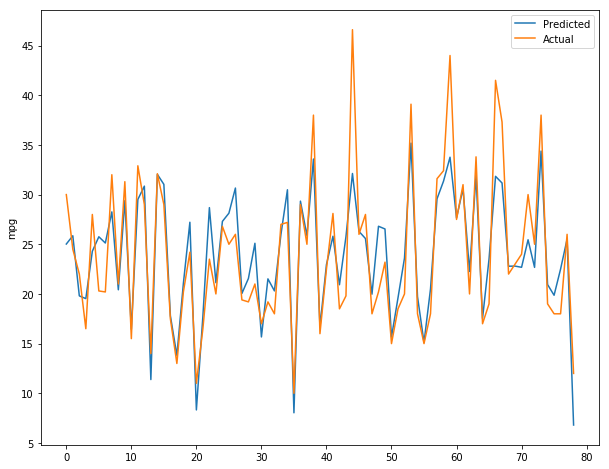

In [116]:

result_dict["mpg- elastic net - all features"] = build_model(
                                                partial(elastic_net_reg,
                                                        alpha=0,
                                                        l1_ratio=0,
                                                        equivalent_to="ridge"),
                                                'mpg',
                                                ['acceleration',
                                                 'cylinders',
                                                'weight',
                                                 'horsepower',
                                                 'age','displacement'],
                                                automobile_df,
                                                show_plot_Y=True)

## Support Vector Regression
Support vector machines are usually used for classification but they can be used for regression as well.  
The princple of Support vector is the same.  
In case of SVM CLassification, the model tries to find the widest margin between nearest points.   
In case of SVM for regression, it tries to find the line that best fits the points.  

In case of, SVM classifier, the objective function is to find a 'street' with no points in between. But in case of SVM regressor, the objective function is to seek to maximize the number of points inside the margin and then find the best line
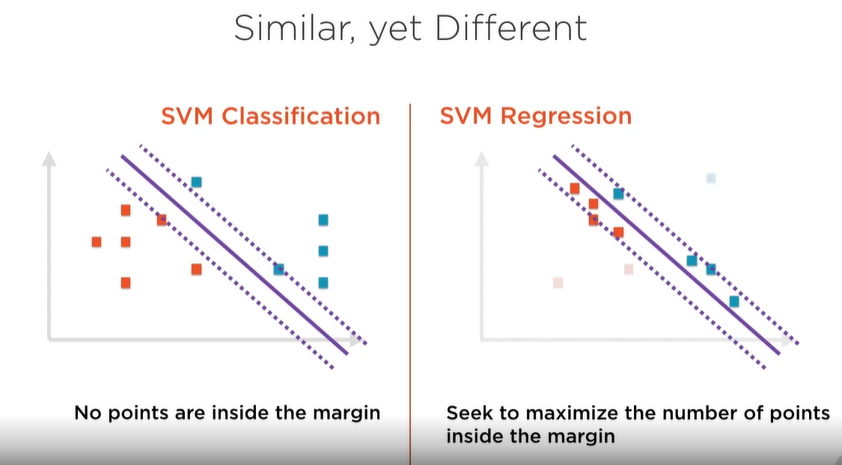

The width of the margin is found out by optimizer in case of SVM classfication. But in case of SVM regression, the margin width is specified up front.

In [120]:
# C = penalty applied to points that lie outisde the margin. It seeks to reduce the margin violations
#
def svr_reg(x_train,y_train,kernel='linear',epsilon=0.05,C=0.3):
    model = SVR(kernel=kernel,epsilon=epsilon,C=C)
    model.fit(x_train,y_train)
    return model

Training Score:  0.7886827296180952
Test Score:  0.7407916476532086


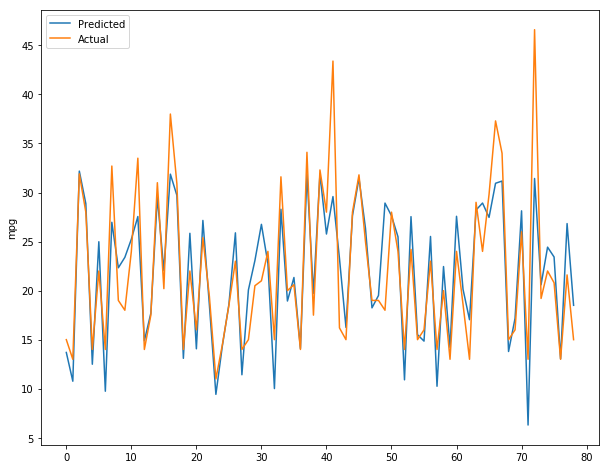

In [124]:

result_dict["mpg- svm-reg - all features"] = build_model(
                                                svr_reg,
                                                'mpg',
                                                ['acceleration',
                                                 'cylinders',
                                                'weight',
                                                 'horsepower',
                                                 'age','displacement'],
                                                automobile_df,
                                                show_plot_Y=True)

In [125]:
compare_results()

Regression:  mpg- single linear
Training score:  0.6916651049365177
Test Score:  0.6938282077862387

Regression:  mpg- multiple linear all features
Training score:  0.8079967652774498
Test Score:  0.8051680563088356

Regression:  mpg- multiple linear 3 features
Training score:  0.8094105577589481
Test Score:  0.7972097998134711

Regression:  mpg- lasso - all features
Training score:  0.8005181793444169
Test Score:  0.8331844233613855

Regression:  mpg- ridge - all features
Training score:  0.8157375205843821
Test Score:  0.7741856331645409

Regression:  mpg- elastic net - all features
Training score:  0.7774722072360103
Test Score:  0.8469852260802895

Regression:  mpg- svm-reg - all features
Training score:  0.7886827296180952
Test Score:  0.7407916476532086



### Nearest Neighbor regression
It uses training data to fnid what is the most similar to the current sample. it tries to find what set of points are close to the sample. k0nearest neighbors and k-radius neighbors are some common nearest neighbor regression.  
To predict the value, we take the average of k-nearest neighbors. or we take the average value of the all the neighbors that lies inside the radius of k

In [129]:
def kneighbors_reg(x_train,y_train,n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train,y_train)
    return model

Training Score:  0.7698103089360628
Test Score:  0.7178520809506707


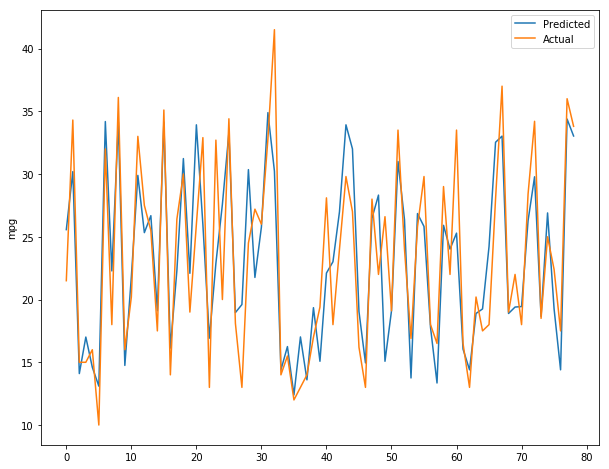

In [130]:

result_dict["mpg- kneighbors - all features"] = build_model(
                                                kneighbors_reg,
                                                'mpg',
                                                ['acceleration',
                                                 'cylinders',
                                                'weight',
                                                 'horsepower',
                                                 'age','displacement'],
                                                automobile_df,
                                                show_plot_Y=True)

In [131]:
compare_results()

Regression:  mpg- single linear
Training score:  0.6916651049365177
Test Score:  0.6938282077862387

Regression:  mpg- multiple linear all features
Training score:  0.8079967652774498
Test Score:  0.8051680563088356

Regression:  mpg- multiple linear 3 features
Training score:  0.8094105577589481
Test Score:  0.7972097998134711

Regression:  mpg- lasso - all features
Training score:  0.8005181793444169
Test Score:  0.8331844233613855

Regression:  mpg- ridge - all features
Training score:  0.8157375205843821
Test Score:  0.7741856331645409

Regression:  mpg- elastic net - all features
Training score:  0.7774722072360103
Test Score:  0.8469852260802895

Regression:  mpg- svm-reg - all features
Training score:  0.7886827296180952
Test Score:  0.7407916476532086

Regression:  mpg- kneighbors - all features
Training score:  0.7698103089360628
Test Score:  0.7178520809506707



### Stochastic Gradient Descent
it finds the best regression coefficient that has the lowest Mean Square Error(MSE). It does this by iteratively converging to the best values  

In [134]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    return scaler.transform(x)

In [144]:
def sgd_regressor(x_train,y_train,max_iter=10,tol=1e-3):
    sgd_model = SGDRegressor(max_iter=max_iter,tol=tol)
    sgd_model.fit(x_train,y_train)
    return sgd_model

Training Score:  0.7853579457075839
Test Score:  0.8247580822699268


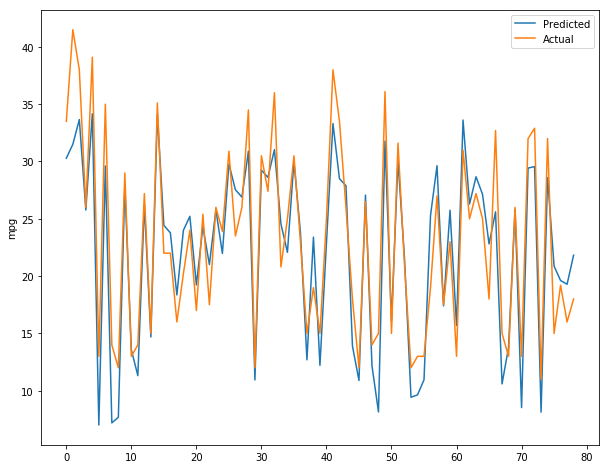

In [153]:

result_dict["mpg- sgd - all features"] = build_model(
                                                sgd_regressor,
                                                'mpg',
                                                ['acceleration',
                                                 'cylinders',
                                                'weight',
                                                 'horsepower',
                                                 'age','displacement'],
                                                automobile_df,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler)

In [154]:
compare_results()

Regression:  mpg- single linear
Training score:  0.6916651049365177
Test Score:  0.6938282077862387

Regression:  mpg- multiple linear all features
Training score:  0.8079967652774498
Test Score:  0.8051680563088356

Regression:  mpg- multiple linear 3 features
Training score:  0.8094105577589481
Test Score:  0.7972097998134711

Regression:  mpg- lasso - all features
Training score:  0.8005181793444169
Test Score:  0.8331844233613855

Regression:  mpg- ridge - all features
Training score:  0.8157375205843821
Test Score:  0.7741856331645409

Regression:  mpg- elastic net - all features
Training score:  0.7774722072360103
Test Score:  0.8469852260802895

Regression:  mpg- svm-reg - all features
Training score:  0.7886827296180952
Test Score:  0.7407916476532086

Regression:  mpg- kneighbors - all features
Training score:  0.7698103089360628
Test Score:  0.7178520809506707

Regression:  mpg- sgd - all features
Training score:  0.7853579457075839
Test Score:  0.8247580822699268



### Decision Trees
Decision tree is usually used for classification but they can be used for regression as well.  
The model will try to find the rules out form the training data to make the decision . The order of the decision algorithm affects the final decision.  
In case of regression, our sample to predict is traversed in the decision tree and the final value is the average of all the data points in that leaf node

In [155]:
#max_depth parameter is needed to prevent the decision tree from growing out of hand
def decision_tree_reg(x_train,y_train,max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train,y_train)
    return model

Training Score:  0.7371969140076153
Test Score:  0.6566300116609085


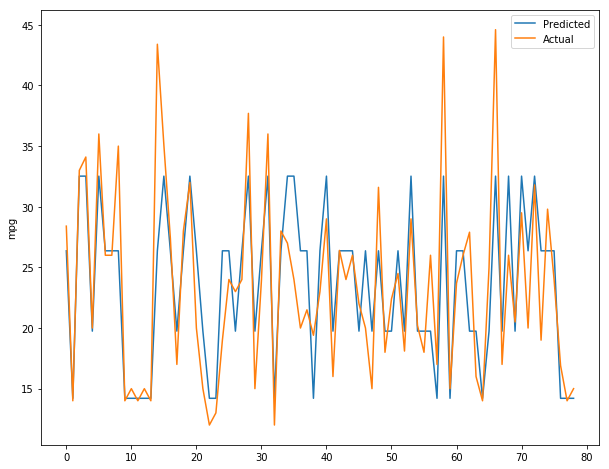

In [156]:

result_dict["mpg- decision tree - all features"] = build_model(
                                                decision_tree_reg,
                                                'mpg',
                                                ['acceleration',
                                                 'cylinders',
                                                'weight',
                                                 'horsepower',
                                                 'age','displacement'],
                                                automobile_df,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler)

### Least angle regression
A regression technique that relies on selecting x-variables that have the highest correlation(least angle) with the unexplained y-variable.  
This is good for datasets where there are high number of x-variables than the data rows itself.  
Tha main idea is to find the x-variable that has the least angle(most correlation) with y-variable in descending order. From higher correlation to lower correlation data.  
one problem with this algorithm, is the issue of multi-collinearity  
This is good for high dimensional data

In [162]:
#n_nonzero_coeff
def lars_reg(x_train,y_train,n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs = n_nonzero_coefs)
    model.fit(x_train,y_train)
    return model

Training Score:  0.8109330843941496
Test Score:  0.7920519040130899


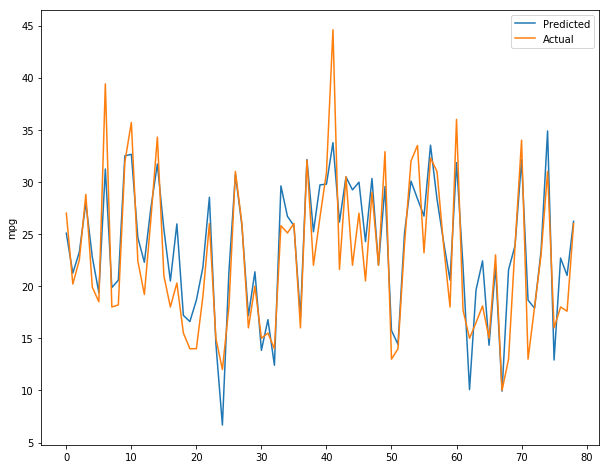

In [163]:

result_dict["mpg- lars - all features"] = build_model(
                                                lars_reg,
                                                'mpg',
                                                ['acceleration',
                                                 'cylinders',
                                                'weight',
                                                 'horsepower',
                                                 'age','displacement'],
                                                automobile_df,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler)

In [164]:
compare_results()

Regression:  mpg- single linear
Training score:  0.6916651049365177
Test Score:  0.6938282077862387

Regression:  mpg- multiple linear all features
Training score:  0.8079967652774498
Test Score:  0.8051680563088356

Regression:  mpg- multiple linear 3 features
Training score:  0.8094105577589481
Test Score:  0.7972097998134711

Regression:  mpg- lasso - all features
Training score:  0.8005181793444169
Test Score:  0.8331844233613855

Regression:  mpg- ridge - all features
Training score:  0.8157375205843821
Test Score:  0.7741856331645409

Regression:  mpg- elastic net - all features
Training score:  0.7774722072360103
Test Score:  0.8469852260802895

Regression:  mpg- svm-reg - all features
Training score:  0.7886827296180952
Test Score:  0.7407916476532086

Regression:  mpg- kneighbors - all features
Training score:  0.7698103089360628
Test Score:  0.7178520809506707

Regression:  mpg- sgd - all features
Training score:  0.7853579457075839
Test Score:  0.8247580822699268

Regression